In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np

%matplotlib inline

In [57]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/SeoulBikeData.csv'
df=pd.read_csv(url,encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [58]:
df.rename({"Rented Bike Count":"bike_count","Temperature(°C)":"temp","Humidity(%)":"humidity",
    "Wind speed (m/s)":"wind_speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"dew_temp"},axis=1,inplace=True)

In [59]:
df.rename({"Solar Radiation (MJ/m2)":"radiation","Rainfall(mm)":"rainfall","Snowfall (cm)":"snowfall","Functioning Day":"function_day"},axis=1,inplace=True)

In [60]:
df.drop(columns=['Seasons',"Date","Holiday"],axis=1,inplace=True)

In [61]:
df["function_day"]=(df["function_day"]=="Yes").astype(int)

In [62]:
df=df[df["Hour"]==12]
df=df.drop(columns=["Hour"])


In [63]:
df.head()

,bike_count,temp,humidity,wind_speed,Visibility,dew_temp,radiation,rainfall,snowfall,function_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


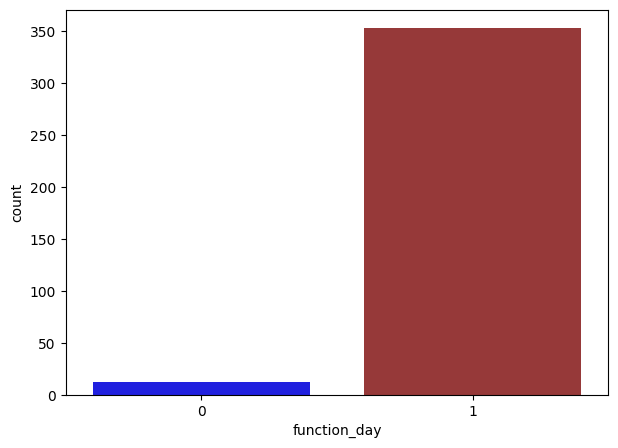

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(x="function_day",data=df,palette=["blue","brown"])
plt.show()

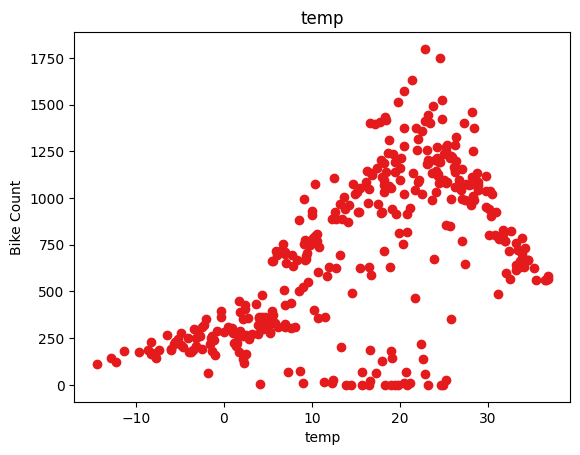

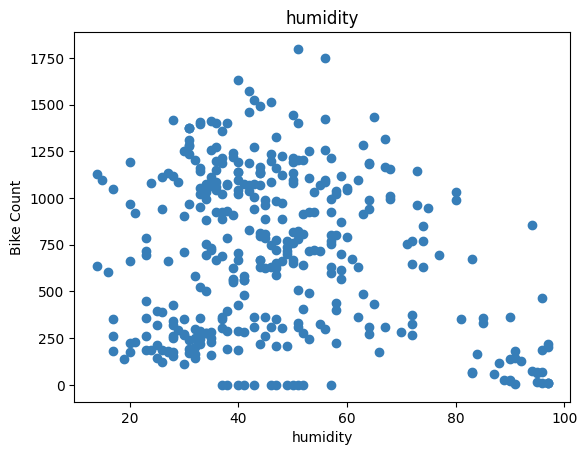

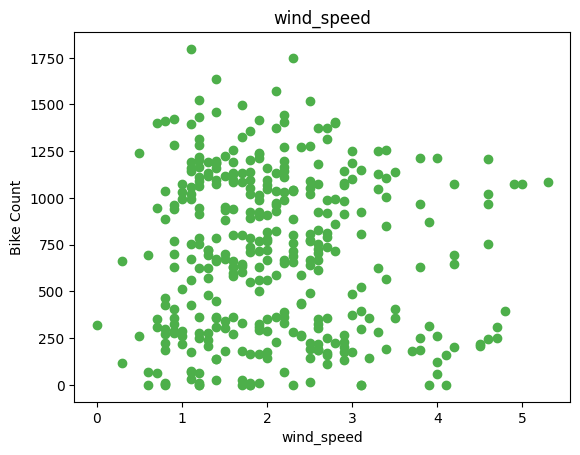

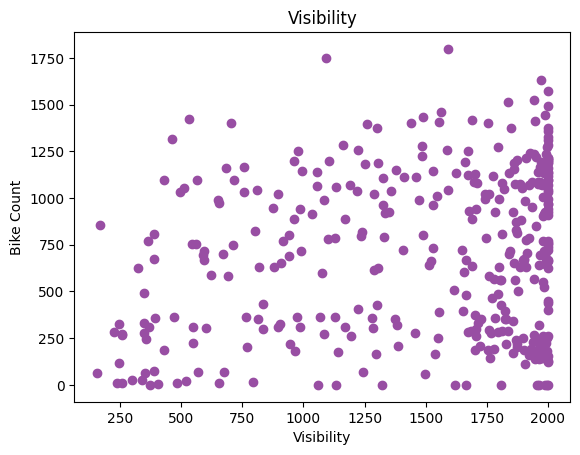

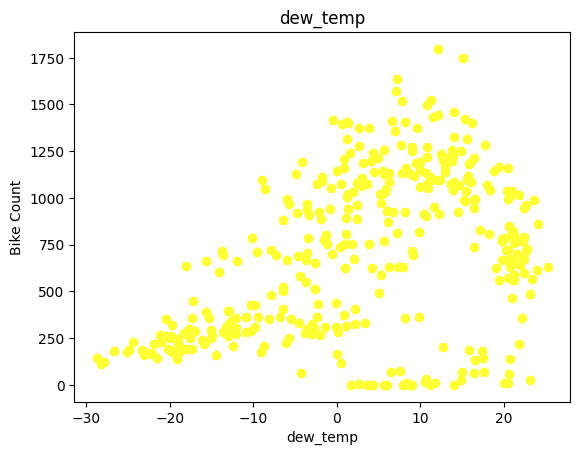

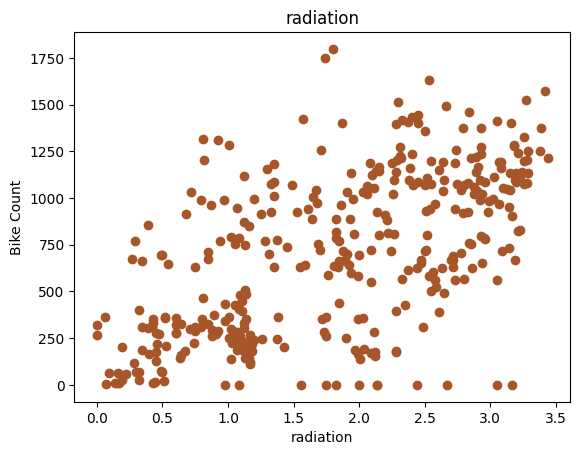

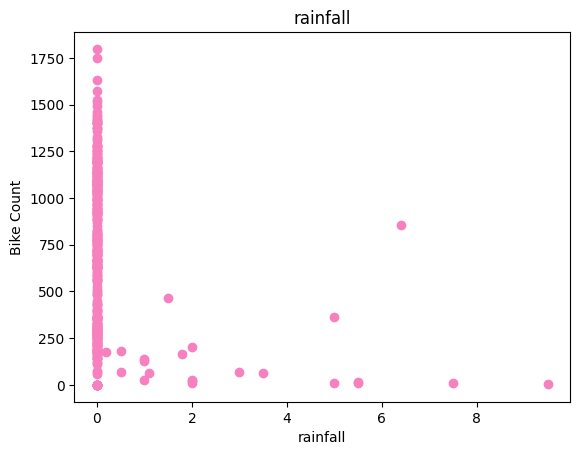

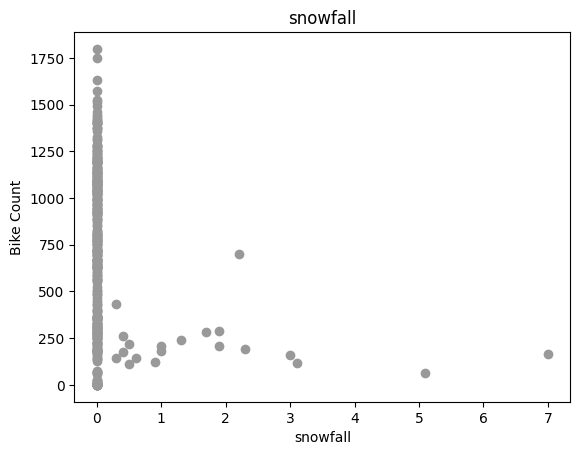

In [65]:
colors = plt.cm.Set1(np.linspace(0, 1, len(df.columns[1:-1])))

for i, x in enumerate(df.columns[1:-1]):
    plt.scatter(df[x], df["bike_count"], color=colors[i])
    plt.title(x)
    plt.xlabel(x)
    plt.ylabel("Bike Count")
    plt.show()

In [66]:
df.drop(columns=["function_day","rainfall","snowfall"],axis=1,inplace=True)

In [67]:
df = df.reset_index(drop=True)

In [68]:
train_data=df.drop(columns=["bike_count"],axis=1)
label_data=df["bike_count"]


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 219.08848954312006


In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.4419737585608695


# Best fit line

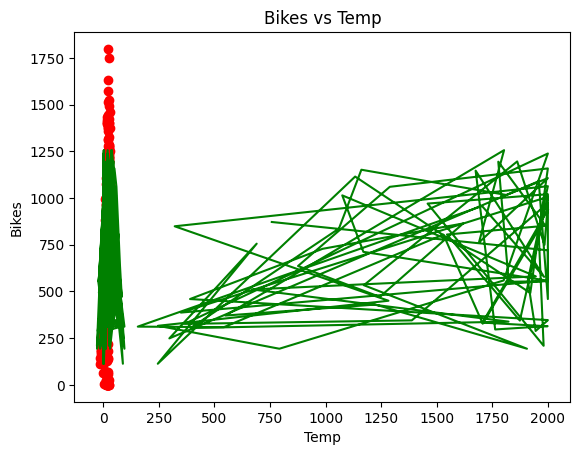

In [73]:
plt.scatter(df[['temp']],df[["bike_count"]],color="red", label="My_Train_Data")
plt.plot(X_test,y_pred,color="green")

plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("Bikes")
plt.show()

# Multiple Linear Regression

In [74]:
df.head()

,bike_count,temp,humidity,wind_speed,Visibility,dew_temp,radiation
0,449,1.7,23,1.4,2000,-17.2,1.11
1,479,4.3,41,1.3,1666,-7.8,1.09
2,333,5.8,85,1.7,349,3.4,0.43
3,393,-0.3,38,4.8,1823,-12.9,1.11
4,321,-2.3,25,0.0,1962,-19.7,0.00


In [75]:
X = df[['temp', 'humidity', 'wind_speed', 'Visibility', 'dew_temp', 'radiation']]
y = df['bike_count']

In [76]:
m_lr=LinearRegression()
m_lr.fit(X,y)

LinearRegression()

In [77]:
print('Coefficients:', m_lr.coef_)

Coefficients: [-1.46576240e+01 -1.30727549e+01 -2.14944633e+01 -2.01984237e-02
  3.36568304e+01  1.41231772e+02]


In [78]:
print('Intercept:', m_lr.intercept_)

Intercept: 1247.616464156887


In [79]:
predictions = m_lr.predict(X)
predictions

array([ 429.40582845,  478.43170784,  182.99112497,  337.84806909,
        251.84125994,  425.71362276,  339.6042968 ,  398.49499414,
        454.24987368,  108.47785483,  292.18143066,  263.87485987,
        300.8048637 ,  280.13060591,  289.3913072 ,  302.39956254,
        312.46997121,   24.06501512,  357.47386769,  248.7193258 ,
        417.01943773,  397.97707986,  322.3998108 ,   73.30344058,
        382.95531678,  327.16070122,  300.6656815 ,  365.31685556,
        326.18289045,  310.42311346,  350.45633736,  369.74412019,
        394.97162594,  326.36339069,  363.89069886,  374.07076268,
        400.24611477,  385.48595513,  373.58783381,  323.60722198,
        241.02108777,  250.90093392,  273.54514119,  149.65487642,
        342.70767244,  376.36188287,  394.4292998 ,  483.47840557,
        145.66288077,  463.11225081,  395.86107212,  463.23591689,
        427.70110703,  212.64760218,  189.7544364 ,  197.49764132,
        186.08891148,  288.77608107,  341.071952  ,  261.01329

In [80]:
m_lr.score(X_test,y_test)

0.46842763489122774

# Regression With Neural Network

In [81]:
from keras.models import Sequential
from keras.layers import Dense


In [82]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam')
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165761 (647.50 KB)
Trainable params: 165761 (647.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
history=NN_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,batch_size=32)

Epoch 1/500
10/10 [==============================] - 1s 32ms/step - loss: 608.7349 - val_loss: 364.1382
Epoch 2/500
10/10 [==============================] - 0s 9ms/step - loss: 437.5255 - val_loss: 363.8959
Epoch 3/500
10/10 [==============================] - 0s 9ms/step - loss: 420.2403 - val_loss: 356.5839
Epoch 4/500
10/10 [==============================] - 0s 10ms/step - loss: 383.9206 - val_loss: 440.8113
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 382.5782 - val_loss: 370.7479
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 378.6737 - val_loss: 385.2943
Epoch 7/500
10/10 [==============================] - 0s 10ms/step - loss: 377.1639 - val_loss: 380.8681
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 374.8072 - val_loss: 382.5562
Epoch 9/500
10/10 [==============================] - 0s 12ms/step - loss: 374.5309 - val_loss: 380.7041
Epoch 10/500
10/10 [==============================] - 0s 9ms/step - l

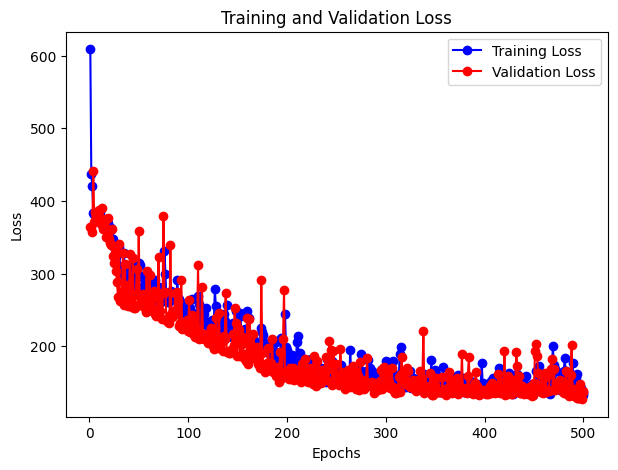

In [84]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(7, 5))
plt.plot(range(1, len(loss) + 1), loss, 'bo-', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




In [88]:
n_pred=NN_model.predict(X_test)
r2_score(y_test,n_pred)

3/3 [==============================] - 0s 6ms/step


0.6192702115469308